# Transcript of the Merlin tutorial February 17th 2021

https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with wl_2021_02
- use jupyter kernel LSST
- requires the installation https://github.com/mfisherlevine/summit
- requires to write in file {HOME}/notebooks/.user_setups


In [1]:
#!/bin/sh
# This file is expected to be found in ${HOME}/notebooks/.user_setups
#  It is a shell fragment that will be sourced during kernel startup
#  when the LSST kernel is started in a JupyterLab environment.  It runs
#  in the user context and can contain arbitrary shell code.  Exported changes
#  in its environment will persist into the JupyterLab Python environment.

#    setup -j rapid_analysis -r ${HOME}/repos/rapid_analysis
#    setup -j atmospec       -r ${HOME}/repos/atmospec

In [2]:
# correct for bug in stack in wl_2021_02
%config IPCompleter.use_jedi=False

# Import

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

# Butler

In [5]:
butler=dafPersist.Butler("/project/shared/auxTel")

In [6]:
dayObs="2020-03-15"

In [7]:
seqNum=162

# Display

In [8]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug1',url=os.environ["FIREFLY_URL"])

In [9]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

AT_O_20200315_000162: Dark time less than exposure time. Setting dark time to the exposure time.
AT_O_20200315_000162: Dark time less than exposure time. Setting dark time to the exposure time.


In [10]:
display1.mtv(raw)

In [11]:
display1.getClient().display_url()

# Meta Query to the Butler

In [12]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 2

In [13]:
seqNums=butler.queryMetadata('raw','seqNum',dayObs=dayObs)

In [14]:
%config IPCompleter.use_jedi=False

# Information

In [15]:
info=raw.getInfo()

### The detector

In [16]:
detector=info.getDetector()

In [17]:
for amp in detector.getAmplifiers():
    print(amp.getName())

C10
C11
C12
C13
C14
C15
C16
C17
C07
C06
C05
C04
C03
C02
C01
C00


In [18]:
%config IPCompleter.use_jedi=False

### The visits

In [19]:
vi=info.getVisitInfo()

In [20]:
vi.getExposureTime()

15.0

In [21]:
vi.getBoresightParAngle()

-1.07474 rad

In [22]:
vi.getBoresightRotAngle()

-1.94749 rad

In [23]:
vi.getWeather()

Weather(nan, nan, nan)

In [24]:
#!ls /home/dagoret/repos/rapid_analysis/python

In [25]:
#import sys
#sys.path.append("/home/dagoret/repos/rapid_analysis") # go to parent dir

# Rapid Analysis

Installed from https://github.com/mfisherlevine/summit

In [26]:
from lsst.rapid.analysis.nightReport import NightReporter
repoDir='/project/shared/auxTel'
reporter=NightReporter(repoDir,"2020-03-15")

Loaded data for seqNums 1 to 343


## Query the reporter

In [27]:
reporter.getObservedObjects()

['HD 107696',
 'WD 1327-083',
 'HD 146233',
 'HD 74576',
 'HD 167060',
 'slew_icrs',
 'HD 164461']

## The logbook

In [28]:
reporter.printObsTable(tailNumber=50)

{seqNum:4} {imageType:9} {obj:10} {timeOfDay} {filt:25} {dt.sec:6.1f}  {expTime:2.2f}
 294 science   WD 1327-083 09:30:47.295 empty~ronchi90lpmm          19.5  15.00
 295 science   WD 1327-083 09:31:06.774 RG610~empty                 19.5  15.00
 296 science   WD 1327-083 09:31:26.833 empty~ronchi90lpmm          20.1  15.00
 297 science   WD 1327-083 09:31:46.546 RG610~empty                 19.7  15.00
 298 science   WD 1327-083 09:32:06.119 empty~ronchi90lpmm          19.6  15.00
 299 science   WD 1327-083 09:32:25.643 RG610~empty                 19.5  15.00
 300 science   WD 1327-083 09:32:45.731 empty~ronchi90lpmm          20.1  15.00
 301 science   WD 1327-083 09:33:05.258 RG610~empty                 19.5  15.00
 302 science   WD 1327-083 09:33:24.852 empty~ronchi90lpmm          19.6  15.00
 303 science   WD 1327-083 09:33:44.855 RG610~empty                 20.0  15.00
 304 science   WD 1327-083 09:34:04.459 empty~ronchi90lpmm          19.6  15.00
 305 science   WD 1327-083 09:34:2

In [29]:
reporter.printObsTable()

{seqNum:4} {imageType:9} {obj:10} {timeOfDay} {filt:25} {dt.sec:6.1f}  {expTime:2.2f}
   1 bias      Park position 17:17:09.157 RG610~empty                  0.0  0.00
   2 bias      Park position 17:17:12.026 RG610~empty                  2.9  0.00
   3 bias      Park position 17:17:18.433 RG610~empty                  6.4  0.00
   4 bias      Park position 17:17:24.347 RG610~empty                  5.9  0.00
   5 bias      Park position 17:17:27.153 RG610~empty                  2.8  0.00
   6 bias      Park position 17:17:29.956 RG610~empty                  2.8  0.00
   7 bias      Park position 17:17:32.750 RG610~empty                  2.8  0.00
   8 bias      Park position 17:17:37.194 RG610~empty                  4.4  0.00
   9 bias      Park position 17:17:44.501 RG610~empty                  7.3  0.00
  10 bias      Park position 17:17:44.501 RG610~empty                  0.0  0.00
  11 science   Park position 19:57:26.750 empty~ronchi90lpmm        9582.2  45.00
  12 science   Park po

## Butler Query meta data

In [30]:
ids=butler.queryMetadata('raw',["dayObs", "seqNum"],object="HD 185975")

In [31]:
count=0
for dataid in ids:
    print(dataid)
    count+=1
    if count>10:
        break

('2020-02-17', 252)
('2020-02-17', 253)
('2020-02-17', 262)
('2020-02-17', 263)
('2020-02-17', 264)
('2020-02-17', 265)
('2020-02-17', 266)
('2020-02-17', 267)
('2020-02-17', 268)
('2020-02-17', 269)
('2020-02-17', 270)


## Some visualisation

In [32]:
%matplotlib inline

/home/dagoret/repos/rapid_analysis/python/lsst/rapid/analysis/nightReport.py:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, polar=True)


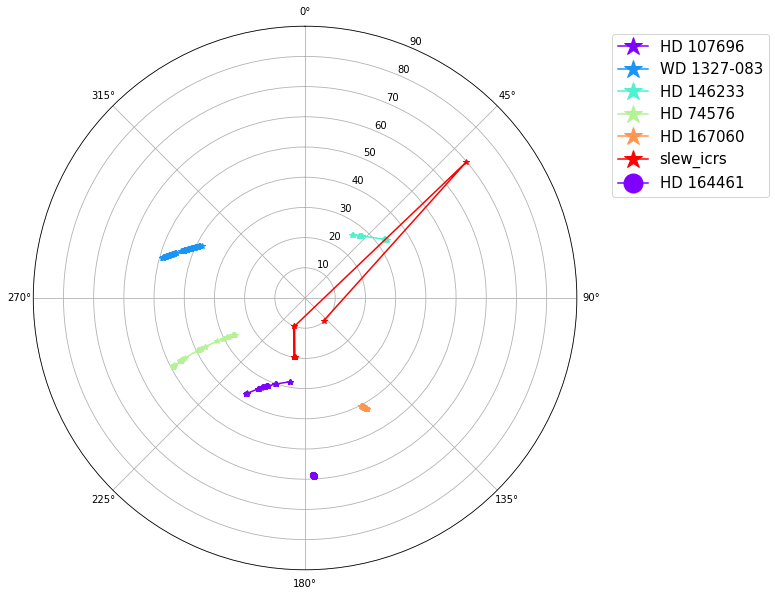

In [33]:
reporter.makePolarPlotForObjects()

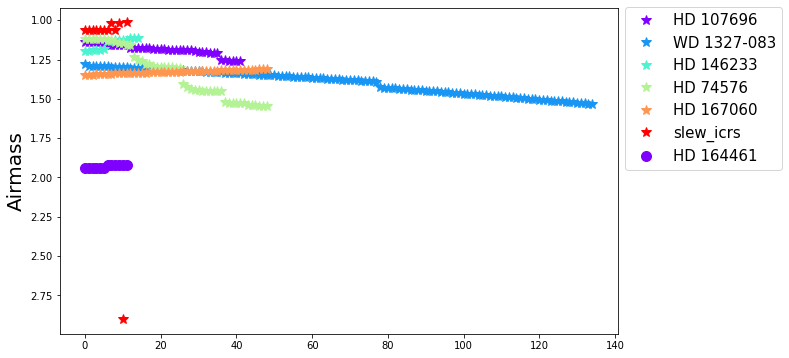

In [34]:
reporter.plotPerObjectAirMass(versusMjd=False)

In [35]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

2021-02-18 12:54:53  astro_metadata_translator.headers fix_header           CRITICAL Ignoring translator header fixup of LATISS AT_O_20200315_000162: 'MJD-OBS not found'


In [36]:
display1.mtv(exp)

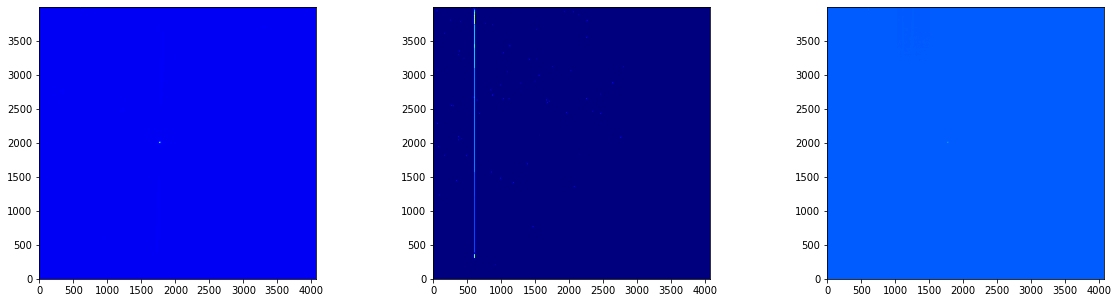

In [37]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(131)
ax1.imshow(exp.image.array,origin="lower",cmap="jet")
ax2=fig.add_subplot(132)
ax2.imshow(exp.mask.array,origin="lower",cmap="jet")
ax3=fig.add_subplot(133)
ax3.imshow(exp.variance.array,origin="lower",cmap="jet")

In [38]:
exp.image.array.shape

(4000, 4072)

In [39]:
raw.image.array.shape

(4096, 4608)

## Meta Data

In [40]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [41]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  '---- Date, night and basic image information ----',
  '---- Telescope info, location, observer ----',
  '---- Pointing info, etc. ----',
  '---- TAN Projection ----',
  '---- Image-identifying used to build OBS-ID ----',
  '---- Information from Camera ----',
  '---- Geometry from Camera ----',
  '---- Filter/grating information ----',
  '---- Exposure-related information ----',
  '---- Header information ----',
  '---- Checksums ----'],
 'ORIGIN': 'LSST DM Header Service',
 'TIMESYS': 'TAI',
 'DATE': '2020-03-16T08:32:58.938',
 'DATE-OBS': '2020-03-16T08:32:40.770',
 'DATE-BEG': '2020-03-16T08:32:40.770',
 'DATE-END': '2020-03-16T08:

In [42]:
rowNum=2005

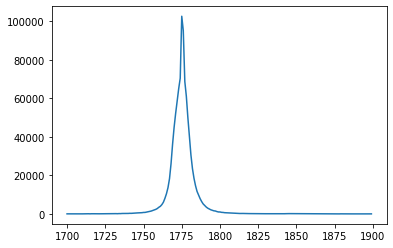

In [43]:
plt.plot(range(1700,1900),exp.image.array[rowNum,1700:1900])